In [57]:
#Importing all important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [58]:
#importing iris dataset
from sklearn.datasets import load_iris

In [59]:
iris=load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


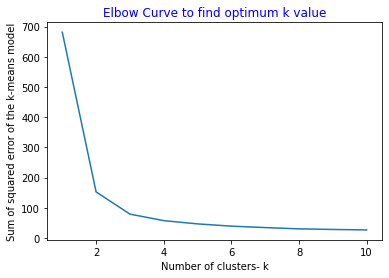

In [60]:
#Finding the optimum no of clusters for K-means Classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

    
    #plotting the result in to line graph
plt.plot(range(1,11),sse)
plt.title('Elbow Curve to find optimum k value',color='blue')
plt.xlabel('Number of clusters- k')
plt.ylabel('Sum of squared error of the k-means model')
plt.show()
    

*** From the above graph here we clearly see the optimum clusters is where the elbow occurs i.e within cluster sum of squared errors does not decrease significantly with every iteration.  ***

***so we will choose Number of cluster =3***

In [61]:
# Applying no of clusters =3
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300 , random_state=0)

y_kmeans = kmeans.fit_predict(x)

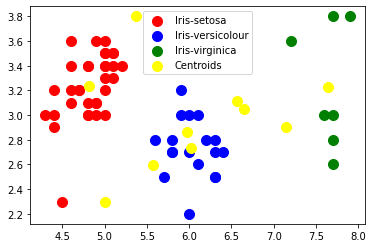

In [62]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()